In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]="4"
import pickle
import argparse
import time
import torch
import soundfile as sf
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import IPython.display as ipd
# import skimage.transform
import numpy as np
import torchvision.transforms as transforms
import seaborn as sns
from PIL import Image
from models import dual_encoder
exp_dir = "/data/scratch/pyp/exp_pyp/discovery/vg-hubert_3" # layer=10, threshold=0.8 works well for vghubert_3
exp_dir = "/saltpool0/scratch/pyp/discovery/vg-hubert_3" # layer=10, threshold=0.8 works well for vghubert_3
with open("%s/args.pkl" % exp_dir, "rb") as f:
    args = pickle.load(f)

args = argparse.Namespace(**vars(args))
model = dual_encoder.DualEncoder(args)
model.load_state_dict(torch.load(os.path.join(exp_dir, "best_bundle.pth"))["dual_encoder"])
model.eval()
model.to("cuda")

/home/pyp/miniconda3/envs/tf2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-11-05 16:52:32 | INFO | models.dual_encoder | Model vitsmall 8x8 built


DualEncoder(
  (audio_encoder): AudioEncoder(
    (feature_extractor): ConvFeatureExtractionModel(
      (conv_layers): ModuleList(
        (0): Sequential(
          (0): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (1): Dropout(p=0.0, inplace=False)
          (2): Fp32GroupNorm(512, 512, eps=1e-05, affine=True)
          (3): GELU()
        )
        (1): Sequential(
          (0): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (1): Dropout(p=0.0, inplace=False)
          (2): GELU()
        )
        (2): Sequential(
          (0): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (1): Dropout(p=0.0, inplace=False)
          (2): GELU()
        )
        (3): Sequential(
          (0): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (1): Dropout(p=0.0, inplace=False)
          (2): GELU()
        )
        (4): Sequential(
          (0): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False

In [2]:
if "SpokenCOCO" in args.train_audio_dataset_json_file:
    audio_root = "/data/scratch/pyp/datasets/coco_pyp/SpokenCOCO/"
    candidates = [{
                "image": "val2014/COCO_val2014_000000554625.jpg",
                "caption": {
                    "text": "A BOY WEARING HEADPHONES USING ONE COMPUTER IN A LONG ROW OF COMPUTERS",
                    "speaker": "myo79vzzpuzjy",
                    "uttid": "myo79vzzpuzjy-35K3O9HUABD0RROUNY1HHLV1P09EFC_554625_28241",
                    "wav": "wavs/train/329/myo79vzzpuzjy-35K3O9HUABD0RROUNY1HHLV1P09EFC_554625_28241.wav"
                },
                "text_alignment": "0.40__A__0.51 0.51__BOY__0.89 0.89__WEARING__1.24 1.24__HEADPHONES__1.85 1.85__USING__2.22 2.22__ONE__2.45 2.45__COMPUTER__3.12 3.12__IN__3.30 3.30__A__3.43 3.43__LONG__3.82 3.82__ROW__4.02 4.02__OF__4.15 4.15__COMPUTERS__5.15"
            },
            {
                "image": "val2014/COCO_val2014_000000374628.jpg",
                "caption": {
                    "text": "A FULL VIEW OF AN OPEN KITCHEN AND DINING AREA",
                    "speaker": "m15gxvhpg896x2",
                    "uttid": "m15gxvhpg896x2-3XC1O3LBOSMOG2GNZ4TABK0MSAATLP_374628_241613",
                    "wav": "wavs/train/136/m15gxvhpg896x2-3XC1O3LBOSMOG2GNZ4TABK0MSAATLP_374628_241613.wav"
                },
                "text_alignment": "0.00__A__0.20 0.20__FULL__0.42 0.42__VIEW__0.58 0.58__OF__0.67 0.67__AN__0.75 0.75__OPEN__1.04 1.04__KITCHEN__1.44 1.44__AND__1.55 1.55__DINING__1.97 1.97__AREA__2.28"
            },
            {
                "image": "val2014/COCO_val2014_000000051191.jpg",
                "caption": {
                    "text": "WHITE TILED BATHROOM WITH A VANITY TUB AND WHITE FLOWERS",
                    "speaker": "m2jpqehz49htdm",
                    "uttid": "m2jpqehz49htdm-3OF2M9AATGO9I874KW6RI8OOKDPKZ1_51191_20792",
                    "wav": "wavs/train/47/m2jpqehz49htdm-3OF2M9AATGO9I874KW6RI8OOKDPKZ1_51191_20792.wav"
                },
                "text_alignment": "1.43__WHITE__2.05 2.05__TILED__2.66 2.66__BATHROOM__3.21 3.21__WITH__3.51 3.54__A__3.77 3.77__VANITY__4.37 4.37__TUB__4.88 4.88__AND__5.46 5.49__WHITE__6.13 6.16__FLOWERS__7.02"
            },
            {
                "image": "train2014/COCO_train2014_000000309511.jpg",
                "caption": {
                    "text": "A YOUNG MAN WHO IS DRINKING A GLASS OF WINE",
                    "speaker": "m2b7l2fwsmok2q",
                    "uttid": "m2b7l2fwsmok2q-3PH3VY7DJLX0D81L9APU6JIJB9HZWD_309511_426660",
                    "wav": "wavs/train/366/m2b7l2fwsmok2q-3PH3VY7DJLX0D81L9APU6JIJB9HZWD_309511_426660.wav"
                },
                "text_alignment": "0.25__A__0.33 0.33__YOUNG__0.52 0.52__MAN__0.75 0.75__WHO__0.84 0.84__IS__0.96 0.96__DRINKING__1.33 1.33__A__1.38 1.38__GLASS__1.70 1.70__OF__1.83 1.83__WINE__2.27"
            },
            {
                "image": "train2014/COCO_train2014_000000348046.jpg",
                "caption": {
                    "text": "A YELLOW AND WHITE CAT ON TOP OF A BLACK LEATHER CUSHION",
                    "speaker": "m3wglzbhiy8w4l",
                    "uttid": "m3wglzbhiy8w4l-37UQDCYH6XV4E9VA05SFTX66R4D7VL_348046_763501",
                    "wav": "wavs/train/121/m3wglzbhiy8w4l-37UQDCYH6XV4E9VA05SFTX66R4D7VL_348046_763501.wav"
                },
                "text_alignment": "1.12__A__1.19 1.19__YELLOW__1.67 1.67__AND__1.86 1.86__WHITE__2.12 2.12__CAT__2.51 2.51__ON__2.67 2.67__TOP__3.10 3.10__OF__3.22 3.22__A__3.28 3.28__BLACK__3.66 3.66__LEATHER__3.91 3.91__CUSHION__4.43"
            },
            {
                "image": "train2014/COCO_train2014_000000166881.jpg",
                "caption": {
                    "text": "A PAIR OF PEOPLE STAND ON A DARK BEACH FLYING A KITE",
                    "speaker": "m1jiaccy3qalod",
                    "uttid": "m1jiaccy3qalod-3F1567XTNW5GNKNMT3WP16Y45569QV_166881_761706",
                    "wav": "wavs/train/414/m1jiaccy3qalod-3F1567XTNW5GNKNMT3WP16Y45569QV_166881_761706.wav"
                },
                "text_alignment": "1.00__A__1.11 1.11__PAIR__1.36 1.36__OF__1.49 1.49__PEOPLE__1.85 1.85__STAND__2.29 2.29__ON__2.45 2.45__A__2.51 2.51__DARK__2.90 2.90__BEACH__3.21 3.21__FLYING__3.62 3.62__A__3.69 3.69__KITE__4.13"
            },
            {
                "image": "train2014/COCO_train2014_000000517522.jpg",
                "caption": {
                    "text": "A MAN RUNNING ON A TENNIS COURT WITH A RACKETT IN HIS HAND",
                    "speaker": "m3ikb9ie32k2x",
                    "uttid": "m3ikb9ie32k2x-3XLBSAQ9Z4CLNT0K12HIE3J2EVW7ZT_517522_509533",
                    "wav": "wavs/train/524/m3ikb9ie32k2x-3XLBSAQ9Z4CLNT0K12HIE3J2EVW7ZT_517522_509533.wav"
                },
                "text_alignment": "0.74__A__0.83 0.83__MAN__1.36 1.50__RUNNING__1.91 1.91__ON__2.21 2.21__A__2.35 2.35__TENNIS__2.77 2.77__COURT__3.09 3.09__WITH__3.18 3.18__A__3.31 3.31__RACKETT__3.90 3.90__IN__4.00 4.00__HIS__4.10 4.10__HAND__4.71"
            },
            {
                "image": "train2014/COCO_train2014_000000158362.jpg",
                "caption": {
                    "text": "A MAN ON HIS LAP TOP ON A BENCH",
                    "speaker": "m1exzmxuk43d2n",
                    "uttid": "m1exzmxuk43d2n-3X4JMASXCM9BNKXKAPG6D62CI4IB0O_158362_681928",
                    "wav": "wavs/train/385/m1exzmxuk43d2n-3X4JMASXCM9BNKXKAPG6D62CI4IB0O_158362_681928.wav"
                },
                "text_alignment": "0.81__A__0.88 0.88__MAN__1.19 1.19__ON__1.34 1.34__HIS__1.59 1.59__LAP__1.81 1.81__TOP__2.12 2.24__ON__2.44 2.44__A__2.50 2.50__BENCH__2.95"
            },
            {
                "image": "train2014/COCO_train2014_000000158362.jpg",
                "caption": {
                    "text": "MAN SITTING ON URBAN BENCH USING LAPTOP COMPUTER",
                    "speaker": "m2p98h3lkipyva",
                    "uttid": "m2p98h3lkipyva-3CFJTT4SXTQZS3BA1YTWE8GCIH97I9_158362_684304",
                    "wav": "wavs/train/385/m2p98h3lkipyva-3CFJTT4SXTQZS3BA1YTWE8GCIH97I9_158362_684304.wav"
                },
                "text_alignment": "0.62__MAN__0.94 0.94__SITTING__1.32 1.32__ON__1.51 1.51__URBAN__1.85 1.85__BENCH__2.30 2.30__USING__2.58 2.58__LAPTOP__3.21 3.21__COMPUTER__3.76"
            },
            {
                "image": "train2014/COCO_train2014_000000158362.jpg",
                "caption": {
                    "text": "A MAN ON A BENCH LOOKING AT HIS LAPTOP",
                    "speaker": "m2zco7272xa5e0",
                    "uttid": "m2zco7272xa5e0-3ZAZR5XV01IRZAVGSJPTUPBGFXMZCV_158362_682780",
                    "wav": "wavs/train/385/m2zco7272xa5e0-3ZAZR5XV01IRZAVGSJPTUPBGFXMZCV_158362_682780.wav"
                },
                "text_alignment": "0.21__A__0.31 0.31__MAN__0.62 0.62__ON__0.73 0.73__A__0.81 0.81__BENCH__1.16 1.16__LOOKING__1.47 1.47__AT__1.62 1.62__HIS__1.78 1.78__LAPTOP__2.45"
            }]
elif "places_hdf5_pyp" in args.train_audio_dataset_json_file:
    audio_root = "/data/scratch/pyp/datasets/PlacesAudio_400k_distro"
    candidates = [
{
      "uttid": "ALN5N2C8H3AT3-GSUN_5D6AF9119218117725E8342B02830B43",
      "speaker": "ALN5N2C8H3AT3",
      "asr_text": "this is a photo of a girl standing in front of a lighthouse the little girls wear blue print dress she has blonde hair and blue eyes the lighthouse in the background is white with a red roof",
      "wav": "wavs/248/utterance_380795.wav",
      "image": "l/lighthouse/gsun_5d6af9119218117725e8342b02830b43.jpg",
      "scenelabel": "lighthouse",
      "text_alignment": "0.43__THIS__0.62 0.62__IS__0.73 0.73__A__0.82 0.82__PHOTO__1.18 1.18__OF__1.26 1.26__A__1.33 1.33__GIRL__1.62 1.62__STANDING__2.12 2.12__IN__2.23 2.23__FRONT__2.51 2.51__OF__2.62 2.62__A__2.67 2.67__LIGHTHOUSE__3.47 4.12__THE__4.63 4.63__LITTLE__4.89 4.89__GIRL'S__5.22 5.22__WEARING__5.52 5.52__BLUE__5.72 5.72__PRINT__6.00 6.00__DRESS__6.63 6.66__SHE__6.83 6.83__HAS__7.02 7.02__BLONDE__7.34 7.34__HAIR__7.77 7.77__AND__7.99 7.99__BLUE__8.23 8.23__EYES__8.84 9.27__THE__9.69 9.72__LIGHTHOUSE__10.27 10.27__IN__10.34 10.34__THE__10.43 10.43__BACKGROUND__10.94 10.94__IS__11.06 11.06__WHITE__11.41 11.41__WITH__11.59 11.59__A__11.66 11.66__RED__11.95 11.95__ROOF__12.14"
    },
    {
"uttid": "A8KHWKKGAGOH0-GSUN_3A7F460E9AD86FEEF08B9D52E2AABDC1",
"speaker": "A8KHWKKGAGOH0",
"asr_text": "picture of disney world there's a man of many talents gym there's also a goofy it's brightly colored",
"wav": "wavs/4/utterance_342031.wav",
"image": "a/amusement_park/gsun_3a7f460e9ad86feef08b9d52e2aabdc1.jpg",
"scenelabel": "amusement_park",
"text_alignment": "0.85__PICTURE__1.22 1.22__OF__1.30 1.30__DISNEY__1.61 1.61__WORLD__2.00 2.55__THERE'S__2.72 2.72__A__2.77 2.77__MAN__3.06 3.06__OF__3.14 3.14__MANY__3.36 3.36__TALENTS__3.72 3.72__GYM__4.00 4.26__THERE'S__4.46 4.46__ALSO__4.71 4.71__A__4.78 4.78__GOOFY__5.25 5.77__IT'S__5.97 5.97__BRIGHTLY__6.26 6.26__COLORED__6.66"
},
{
"uttid": "A2WQT33K6LD9Z5-GSUN_3B1FB5BDCB2390BFB13047C583E9F82A",
"speaker": "A2WQT33K6LD9Z5",
"asr_text": "photograph of a train that is blurry going down railroad tracks on a very overcast day",
"wav": "wavs/5/utterance_224571.wav",
"image": "t/train_railway/gsun_3b1fb5bdcb2390bfb13047c583e9f82a.jpg",
"scenelabel": "train_railway",
"text_alignment": "0.00__PHOTOGRAPH__0.98 0.98__OF__1.30 1.30__A__1.68 1.68__TRAIN__2.17 2.17__THAT__2.35 2.35__IS__2.60 2.60__BLURRY__3.22 3.26__GOING__3.63 3.63__DOWN__3.99 3.99__RAILROAD__4.52 4.52__TRACKS__5.06 5.06__ON__5.20 5.20__A__5.30 5.39__VERY__5.62 5.62__OVERCAST__6.46 6.46__DAY__6.71"
},
{
"uttid": "A1KH1O9AZ7S642-GSUN_16A6B871CE9F2BAEBAB17247EA185456",
"speaker": "A1KH1O9AZ7S642",
"asr_text": "the large view of the city street there are many people walking around the street",
"wav": "wavs/6/utterance_335654.wav",
"image": "a/alley/gsun_16a6b871ce9f2baebab17247ea185456.jpg",
"scenelabel": "alley",
"text_alignment": "0.16__THE__0.38 0.38__LARGE__0.85 0.85__VIEW__1.04 1.04__OF__1.13 1.13__THE__1.21 1.21__CITY__1.54 1.54__STREET__1.96 2.04__THERE__2.21 2.21__ARE__2.25 2.25__MANY__2.52 2.52__PEOPLE__2.85 2.85__WALKING__3.22 3.22__AROUND__3.51 3.51__THE__3.58 3.58__STREET__3.96"
},
{
"uttid": "A1KH1O9AZ7S642-GSUN_695A0ABEE3C0C24AA69C2C37A51C2364",
"speaker": "A1KH1O9AZ7S642",
"asr_text": "the train is coming our way we're near a train station",
"wav": "wavs/25/utterance_212666.wav",
"image": "t/train_station/platform/gsun_695a0abee3c0c24aa69c2c37a51c2364.jpg",
"scenelabel": "train_station-platform",
"text_alignment": "0.28__THE__0.37 0.37__TRAIN__0.71 0.71__IS__0.83 0.83__COMING__1.13 1.13__OUR__1.27 1.27__WAY__1.60 1.87__WE'RE__2.05 2.05__NEAR__2.26 2.26__A__2.31 2.31__TRAIN__2.60 2.60__STATION__3.16"
},
{
"uttid": "A16G6PPH1INQL8-GSUN_3FF681C9F23AF4FAF7A4E7AD348EF508",
"speaker": "A16G6PPH1INQL8",
"asr_text": "there is a red car in front of the building",
"wav": "wavs/46/utterance_191349.wav",
"image": "m/mansion/gsun_3ff681c9f23af4faf7a4e7ad348ef508.jpg",
"scenelabel": "mansion",
"text_alignment": "2.81__THERE__3.06 3.06__IS__3.21 4.84__A__4.95 4.95__RED__5.26 5.26__CAR__5.51 5.51__IN__5.62 5.62__FRONT__5.79 5.79__OF__5.99 5.99__THE__6.22 10.27__BUILDING__10.52"
},
{
"uttid": "A21EKAOO57Y6KA-GSUN_15E5C5AC4568C1D21936AE5051825E21",
"speaker": "A21EKAOO57Y6KA",
"asr_text": "a woman and what looks like her child is at a playground the woman is wearing a tan or brown shirt with sunglasses the child is in one of those captains porthole type things and he's either looking very sad very happy",
"wav": "wavs/59/utterance_32051.wav",
"image": "p/playground/gsun_15e5c5ac4568c1d21936ae5051825e21.jpg",
"scenelabel": "playground",
"text_alignment": "1.04__A__1.25 1.25__WOMAN__1.76 1.76__AND__2.07 2.07__WHAT__2.28 2.28__LOOKS__2.61 2.61__LIKE__2.84 2.84__HER__3.10 3.10__CHILD__3.70 3.73__IS__3.90 3.90__AT__4.07 4.07__A__4.13 4.13__PLAYGROUND__4.82 4.85__THE__4.95 4.95__WOMAN__5.31 5.31__IS__5.46 5.46__WEARING__5.87 6.01__A__6.17 6.17__TAN__6.71 6.78__OR__7.03 7.03__BROWN__7.34 7.34__SHIRT__7.69 7.69__WITH__7.89 7.89__SUNGLASSES__8.85 9.46__THE__9.59 9.59__CHILD__10.20 10.23__IS__10.62 10.62__IN__10.82 10.82__ONE__10.96 10.96__OF__11.09 11.09__THOSE__11.59 11.63__CAPTAINS__12.19 12.19__<SPOKEN_NOISE>__12.68 12.68__TYPE__12.97 13.04__THINGS__13.59 13.81__AND__14.09 14.09__HE'S__14.39 14.42__EITHER__14.71 14.71__LOOKING__15.07 15.07__VERY__15.33 15.33__SAD__15.80 15.80__VERY__16.09 16.09__HAPPY__16.64"
},
{"uttid": "A2BSULOV6QDJ0P-GSUN_758A5EE27625F5D4D640721151C84CC3",
"speaker": "A2BSULOV6QDJ0P",
"asr_text": "picture of a woman standing in front of a large silver globe there are two cartoon characters that look to be made out of bushes goofy and daffy duck behind her",
"wav": "wavs/44/utterance_219124.wav",
"image": "t/topiary_garden/gsun_758a5ee27625f5d4d640721151c84cc3.jpg",
"scenelabel": "topiary_garden",
"text_alignment": "0.51__PICTURE__1.06 1.06__OF__1.22 1.22__A__1.27 1.27__WOMAN__1.67 1.67__STANDING__2.27 2.27__IN__2.46 2.46__FRONT__2.82 2.82__OF__2.93 2.93__A__2.99 2.99__LARGE__3.62 3.62__SILVER__4.06 4.06__GLOBE__4.57 5.15__THERE__5.40 5.40__ARE__5.70 5.70__TWO__6.26 6.29__CARTOON__6.84 6.84__CHARACTERS__7.45 7.45__THAT__7.63 7.63__LOOK__7.84 7.84__TO__7.93 7.93__BE__8.09 8.09__MADE__8.39 8.39__OUT__8.58 8.58__OF__9.02 9.14__BUSHES__9.86 10.38__GOOFY__11.07 11.07__AND__11.30 11.30__DAFFY__11.74 11.74__DUCK__12.05 12.05__BEHIND__12.52 12.52__HER__12.80"
},
{
"uttid": "ALT6TQMZJKSFQ-GSUN_E0AB805DF5714609ABE149EF8C2AC14F",
"speaker": "ALT6TQMZJKSFQ",
"asr_text": "picture of a highway with their cars and trucks on it the large blue sign and trees on both sides",
"wav": "wavs/45/utterance_292728.wav",
"image": "h/highway/gsun_e0ab805df5714609abe149ef8c2ac14f.jpg",
"scenelabel": "highway",
"text_alignment": "0.57__PICTURE__0.84 0.84__OF__0.90 0.90__A__0.94 0.94__HIGHWAY__1.47 1.47__WITH__1.65 1.65__THEIR__1.94 2.13__CARS__2.48 2.48__AND__2.59 2.59__TRUCKS__2.92 2.92__ON__3.13 3.13__IT__3.42 3.85__THE__4.04 4.04__LARGE__4.36 4.36__BLUE__4.59 4.59__SIGN__5.28 5.64__AND__5.81 5.81__TREES__6.16 6.16__ON__6.30 6.30__BOTH__6.51 6.51__SIDES__7.19"
},
{
"uttid": "A1LSZRMNFLE4FR-GSUN_AE205FE6D3CF484332F0EC3973BCFB9B",
"speaker": "A1LSZRMNFLE4FR",
"asr_text": "there is a building and the building is near palm trees",
"wav": "wavs/62/utterance_182410.wav",
"image": "m/motel/gsun_ae205fe6d3cf484332f0ec3973bcfb9b.jpg",
"scenelabel": "motel",
"text_alignment": "1.19__THERE__1.43 1.43__IS__1.64 1.64__A__1.77 1.77__BUILDING__2.46 2.49__AND__2.69 2.69__THE__2.79 2.79__BUILDING__3.34 3.34__IS__3.61 3.61__NEAR__3.86 3.86__PALM__4.34 4.34__TREES__4.97"
}
]


In [3]:
def get_word_ali(raw_ali, fps=50):
    """
    raw_ali is a string like 'start1__word1__end1 start2__word2__end2 ...'
    """
    data = []
    meta_toks = raw_ali.split()
    for meta_tok in meta_toks:
        toks = meta_tok.split('__')
        if len(toks) == 3:
            data.append((float(toks[0])*fps, float(toks[2])*fps, toks[1]))
    return data

def plot_multi_attention(ax, cls_attn_weights, threshold=0.9,fontsize=12, ybot_r=0, ytop_r=0.1, color='red', valter=False, xleft_r=0, adjust=0.002):
    
    (ymin, ymax) = ax.get_ylim()
    (xmin, xmax) = ax.get_xlim()
    ybot = (0 + ybot_r) * ymax
    ytop = (0 + ytop_r) * ymax
    
    # horizontal lines
    botline = Line2D([xmin, xmax], [ybot, ybot], color='black')
    topline = Line2D([xmin, xmax], [ytop, ytop], color='black')    
    botline.set_clip_on(False)
    topline.set_clip_on(False)
    ax.add_line(botline)
    ax.add_line(topline)
    
    threshold_values = []
    step_size = (xmax - xmin) / cls_attn_weights.shape[-1]
    colors = ['tab:red', 'green',  'tab:gray', 'slategrey', 'fuchsia','tab:green', 'tab:brown', 'blue', 'tab:olive', 'purple', 'tab:orange', 'm']
    for i in range(cls_attn_weights.shape[0]):
        if True:
            color_used = colors[i]
            attn_weight = cls_attn_weights[i].squeeze()
            threshold_values.append(torch.quantile(attn_weight, threshold))
            threshold_value = torch.quantile(attn_weight, threshold)
            attn_weight_thres = torch.nn.functional.threshold(attn_weight,threshold_value,0)
            attn_weight_thres = attn_weight_thres/attn_weight_thres.max()
            for t in range(cls_attn_weights.shape[-1]):
                ax.axvspan(t*step_size-adjust, (t+1)*step_size-adjust, ymin=ybot, ymax=ytop, alpha=attn_weight_thres[t].item(), color=color_used)
    return ax

def plot_one_ali(ax, ali, fontsize=14, xmax_actual = 607, ybot_r=0, ytop_r=0.1, color='red', valter=False, xleft_r=0, adjust=0):
    (ymin, ymax) = ax.get_ylim()
    (xmin, xmax) = ax.get_xlim()
    ybot = (0 + ybot_r) * ymax
    ytop = (0 + ytop_r) * ymax
    
    # horizontal lines
    botline = Line2D([xmin, xmax], [ybot, ybot], color='black')
    topline = Line2D([xmin, xmax], [ytop, ytop], color='black')    
    botline.set_clip_on(False)
    topline.set_clip_on(False)
    ax.add_line(botline)
    ax.add_line(topline)
    
    # text location parameters
    sign = 1
    ydelta = (ytop - ybot)*0.2
    ymid = (ybot*0.6 + ytop*0.4)
    
    for (t_s, t_e, lab) in ali:
        t_s = t_s/xmax_actual-adjust
        t_e = t_e/xmax_actual-adjust
        # add label
        text_xs = t_s + (t_e - t_s) * 0.1
        text_ys = ymid + sign*ydelta if valter else ymid
        sign = sign*-1
        ax.text(text_xs, text_ys, lab, fontsize=fontsize)
        
        # add label boundaries
        vline_s = Line2D([t_s, t_s], [ybot, ytop], ls='dashed', color=color, alpha=0.3)
        vline_e = Line2D([t_e, t_e], [ybot, ytop], ls='dashed', color=color, alpha=0.3)
        vline_s.set_clip_on(False)
        vline_e.set_clip_on(False)        
        ax.add_line(vline_s)
        ax.add_line(vline_e)

In [4]:
def compact_plot(audio_path, text_alignment, tgt_layer=7, threshold=0.9, pivotal_token=0):
    audio, sr = sf.read(audio_path, dtype = 'float32')
    if args.normalize:
        audio = (audio - np.mean(audio))/np.std(audio)
    audio = torch.from_numpy(audio).unsqueeze(0).cuda()
    with torch.no_grad():
        attn_weights = model.audio_encoder.get_last_selfattention(audio, tgt_layer=tgt_layer, padding_mask = None)
        cls_attn_weights = attn_weights[:,:,pivotal_token,1:].transpose(0,1)
    word_ali = get_word_ali(text_alignment,fps=cls_attn_weights.shape[-1] / (audio.shape[1]/sr))
    plt.figure(figsize=(34,1.5))
    ax = plt.gca()
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    plot_multi_attention(ax, cls_attn_weights.cpu(), threshold=threshold, fontsize=1, ybot_r=0, ytop_r=0.5, color='red', valter=False, xleft_r=0, adjust=0)
    plot_one_ali(ax, word_ali, xmax_actual=cls_attn_weights.shape[-1], fontsize=15, ybot_r=0.5, ytop_r=1, color='red', valter=False, xleft_r=0, adjust=0)
    # plt.savefig(f"{os.path.basename(audio_path)}.pdf", dpi=200)

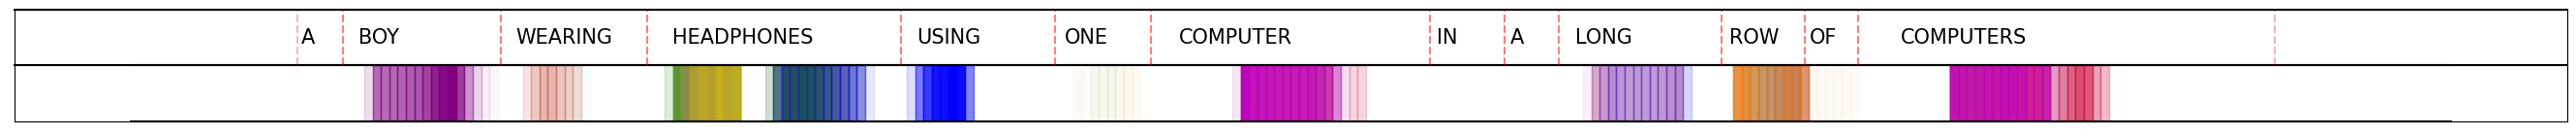

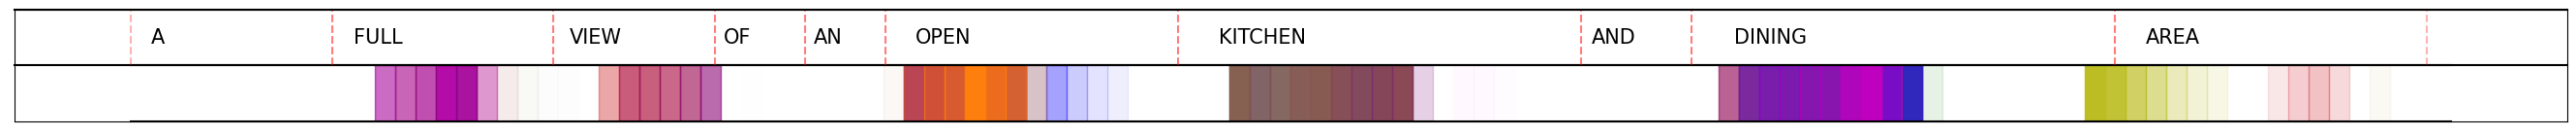

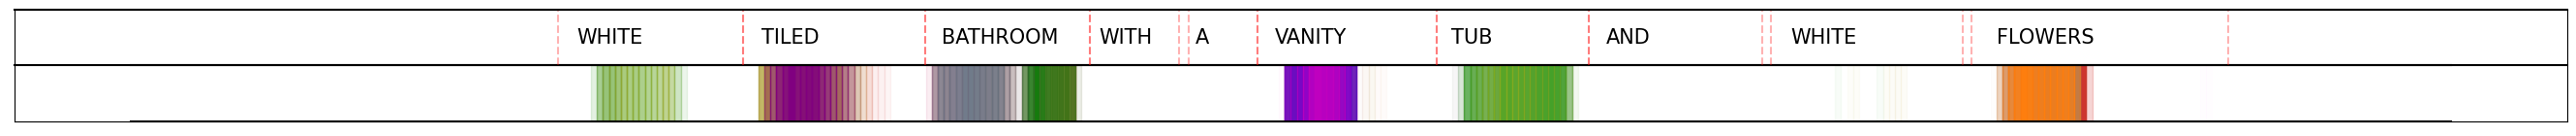

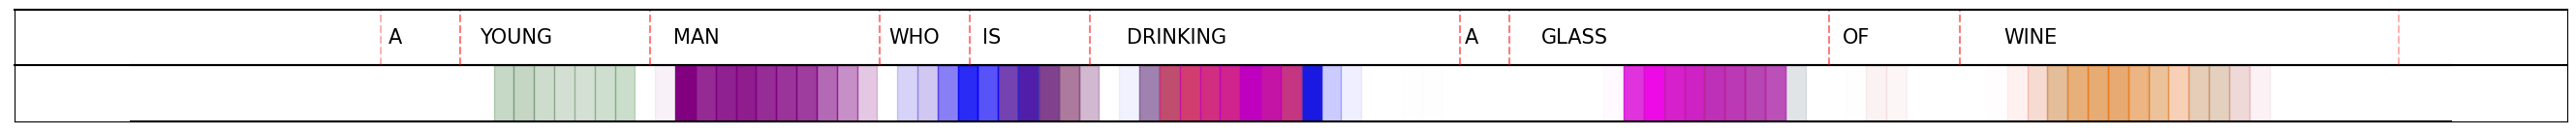

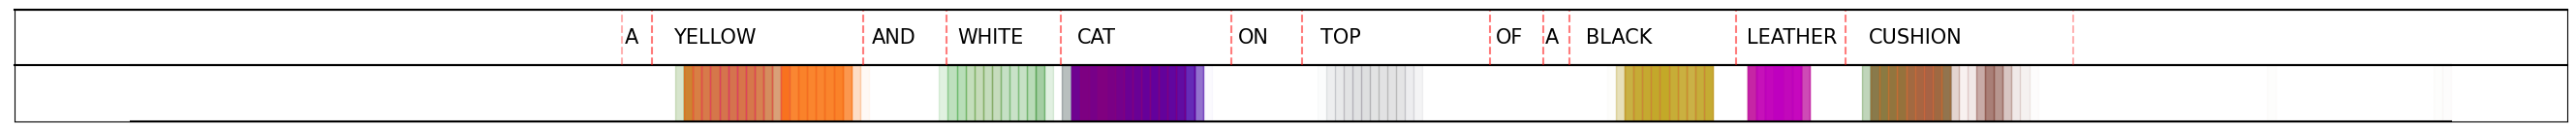

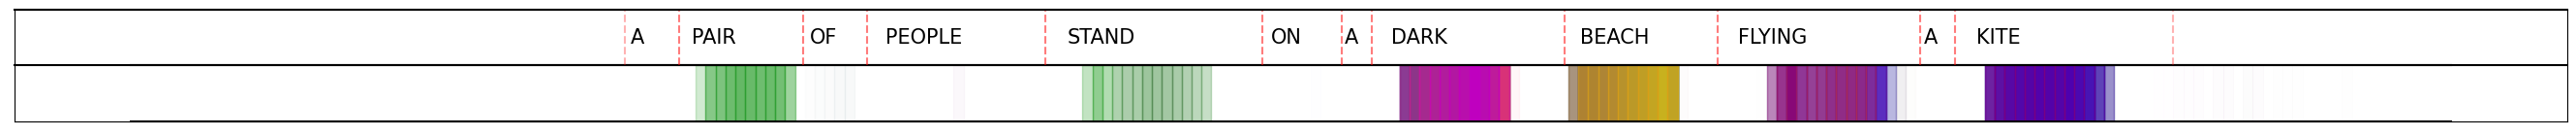

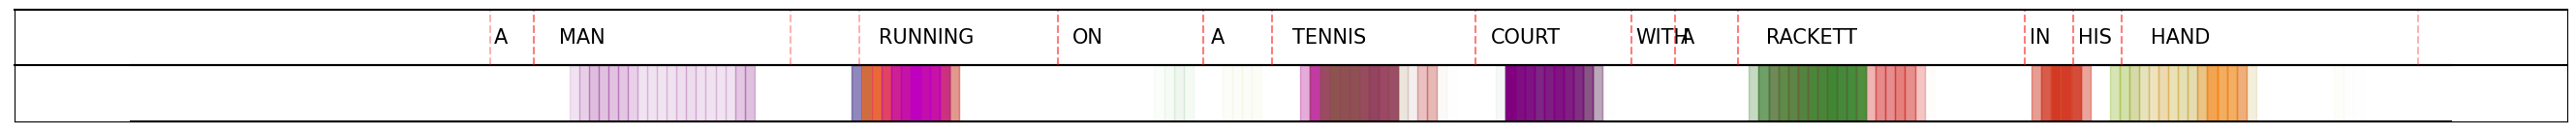

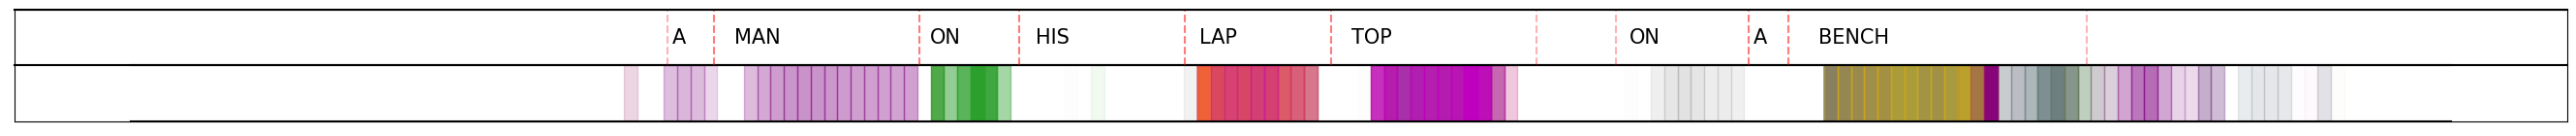

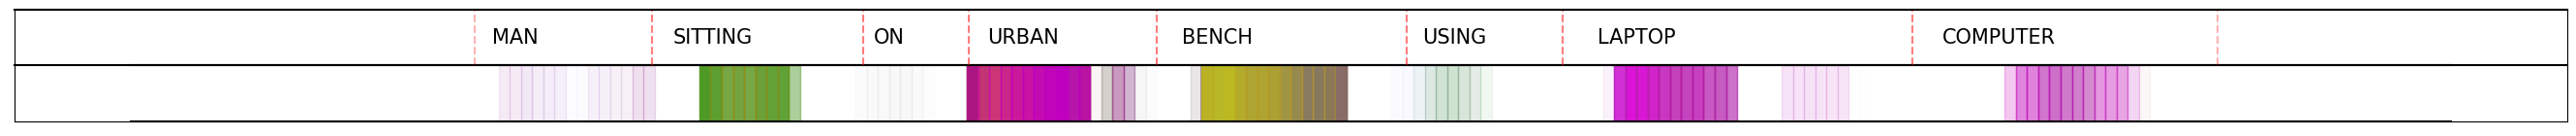

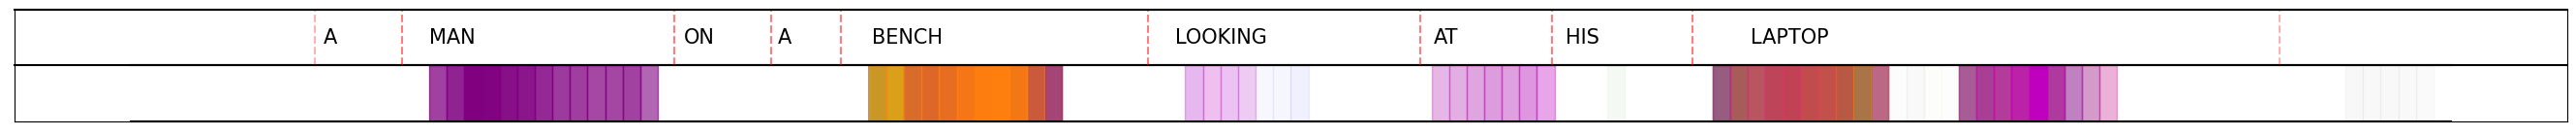

In [5]:
for item in candidates:
    if not os.path.isdir(audio_root):
        audio_root = "/data1/scratch/coco_pyp/SpokenCOCO/"
    fn = item['caption']['wav'] if 'caption' in item else item['wav']
    audio_path = os.path.join(audio_root, fn)
    compact_plot(audio_path, item['text_alignment'], tgt_layer=10, pivotal_token=0, threshold=0.8)
    # break


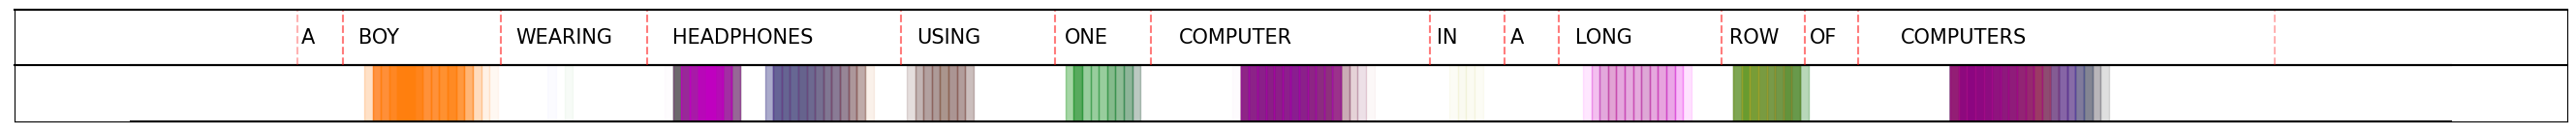

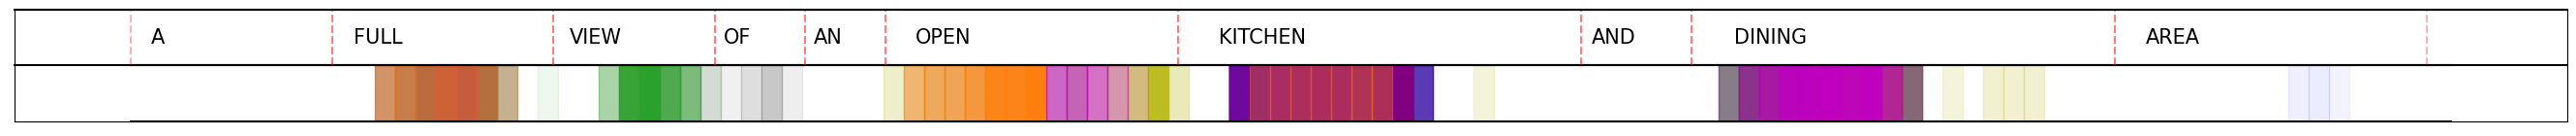

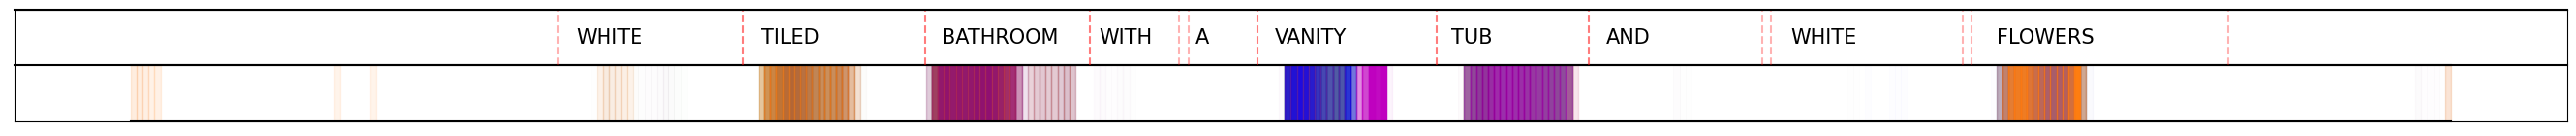

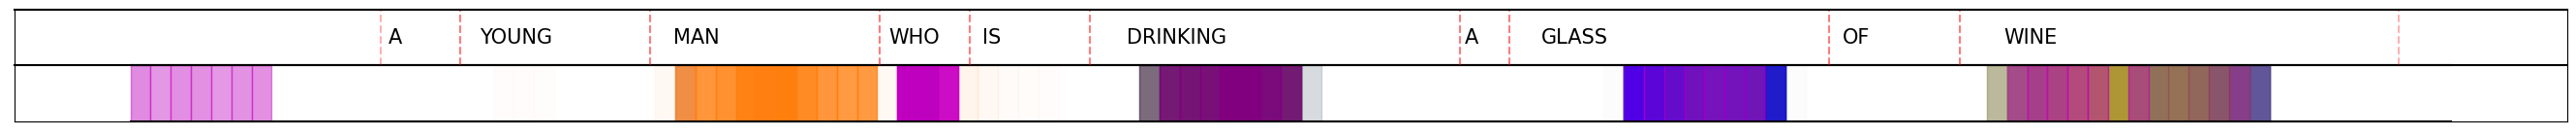

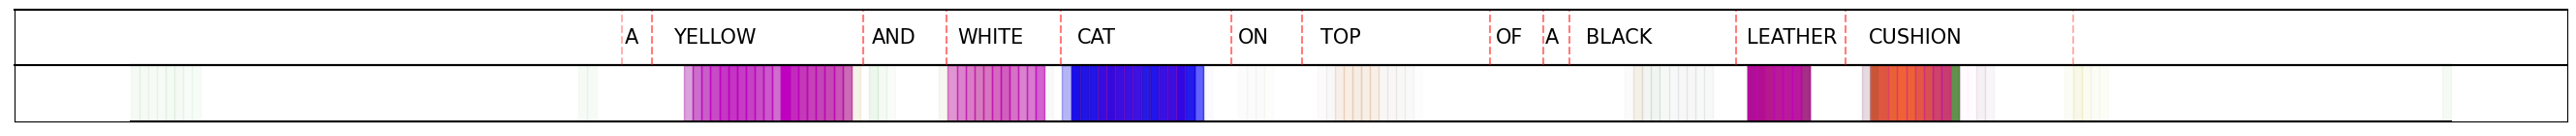

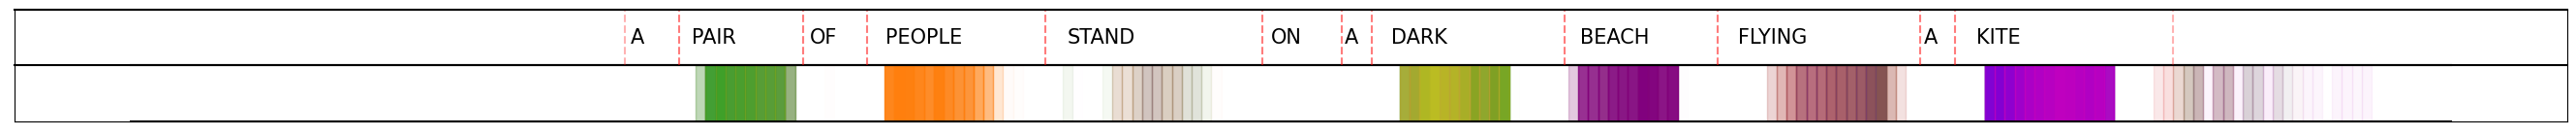

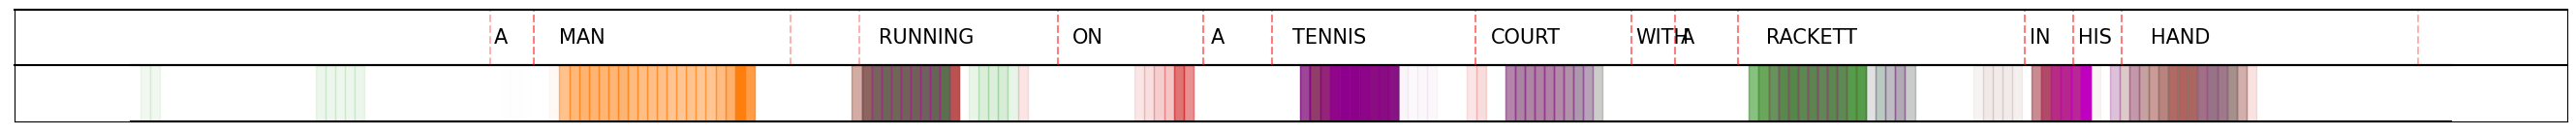

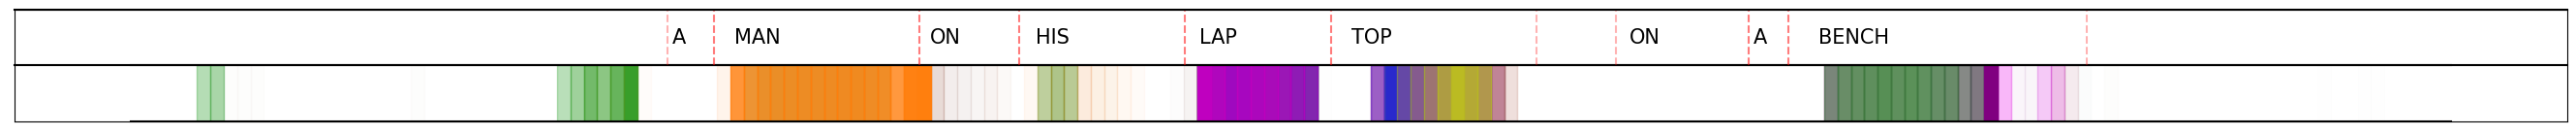

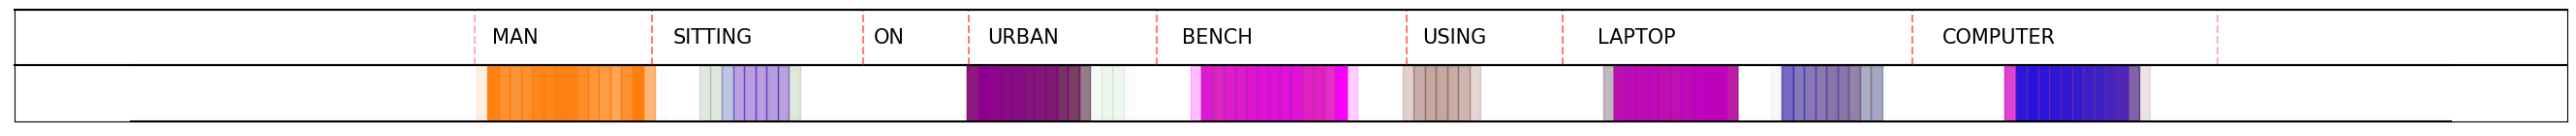

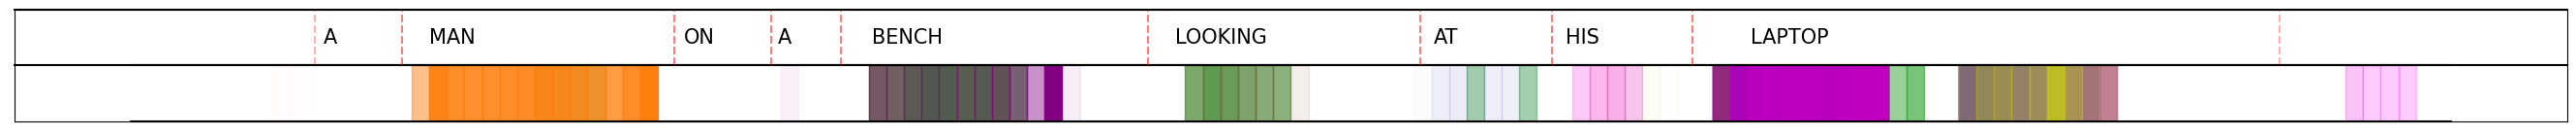

In [6]:
for item in candidates:
    if not os.path.isdir(audio_root):
        audio_root = "/data1/scratch/coco_pyp/SpokenCOCO/"
    fn = item['caption']['wav'] if 'caption' in item else item['wav']
    audio_path = os.path.join(audio_root, fn)
    compact_plot(audio_path, item['text_alignment'], tgt_layer=11, pivotal_token=0, threshold=0.8)
    # break